# Proyecto Final - Primera entrega

## Presentación de la empresa, organización o problema específico

#### La empresa es DATA AR: Una consultora que realiza análisis de Datos. Nuestro cliente en cuestión es una importante empresa de telecomunicaciones que se pone en contacto con nosotros para que realicemos un estudio del comportamiento de los usuarios que contratan su servicio y detectemos patrones capaz de predecir quienes podrian abandonar el servicio, asi de esa forma poder anticiparse mediante estrategias de retención.

## Preguntas y objetivos de la investigación

#### El objetivo de la investigación es segmentar los usuarios que tienen mayor tendencia a abandonar el servicio. Para ello surgen las siguientes preguntas:
#### o	Existen patrones que nos permita predecir si el cliente va a dejar la compania? 
#### o	Es posible a partir de las conclusiones aplicar un plan de accion para reducir el churn?

## Conformación del equipo de trabajo

##### o	Leandro Márquez – Data Science specialist 
##### o	Javier Gohlke – Data Science specialist
##### o	Federico Márquez – Data Science specialist
##### o	Guillermo Flores – Data Science specialist
##### o	Fransico Riveros – Data Science specialist

## Fuente del dataset y criterios de selección (Data Acquisition).

#### Fuente: https://www.kaggle.com/blastchar/telco-customer-churn
#### Hemos seleccionado este Dataset ya que brinda mucho información sobre los usuarios, tiene una variable target clara, y no presenta valores nulos o faltantes, haciendo mas sencilla la tarea de Data Wrangling. En cuanto al contenido, presenta datos demográficos de los clientes, servicios contratados, facturacion y su condición de activo o abandono.

## EDA y  Data Wrangling

#### Partimos de un dataset en .csv descargado de su fuente en kaggle. Lo primero que hicimos fue realizar una lectura y comprensión de los datos

### Importación de librerias, lectura del CSV e información global de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Forma del DF
df.shape

(7043, 21)

In [3]:
# Info (count, type, nulls) del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Valores únicos:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
# Columnas numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Historia de los datos

#### En base a la lectura de los datos y la investigación al respecto, somos capaces de describir que significa cada dato:
##### customerID: ID del cliente
##### gender: Si el cliente es hombre o mujer
##### SeniorCitizen: Si el cliente es adulto mayor o no (1, 0)
##### Partner: Si el cliente tiene pareja o no (Sí, No)
##### Dependents: Si el cliente tiene dependientes o no (Sí, No)
##### tenure: Número de meses que el cliente ha permanecido en la empresa
##### PhoneService: Si el cliente tiene servicio telefónico o no (Sí, No)
##### MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, Sin servicio telefónico)
##### InternetService: Proveedor de servicios de Internet del cliente (DSL, Fibra óptica, No)
##### OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)
##### OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, Sin servicio de Internet)
##### DeviceProtection: Si el cliente tiene protección de dispositivo o no (Sí, No, Sin servicio de Internet)
##### TechSupport: Si el cliente cuenta con soporte técnico o no (Sí, No, Sin servicio de internet)
##### StreamingTV: Si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de Internet)
##### StreamingMovies: Si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de Internet)
##### Contract: El plazo del contrato del cliente (Mes a mes, Un año, Dos años)
##### PaperlessBilling: Si el cliente tiene facturación electrónica o no (Sí, No)
##### PaymentMethod: El método de pago del cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria (automática), Tarjeta de crédito (automática))
##### MonthlyCharges: El monto cobrado al cliente mensualmente
##### TotalCharges: El importe total cobrado al cliente.
##### Churn: Si el cliente abandonó o no (Sí o No) VARIABLE TARGET

### Análisis univariado

##### Exhibimos los resultados de las variables númericas, dejando las categoricas para analizar de manera bivariada

#### Análisis univariado - Cobros mensuales

<AxesSubplot:xlabel='MonthlyCharges'>

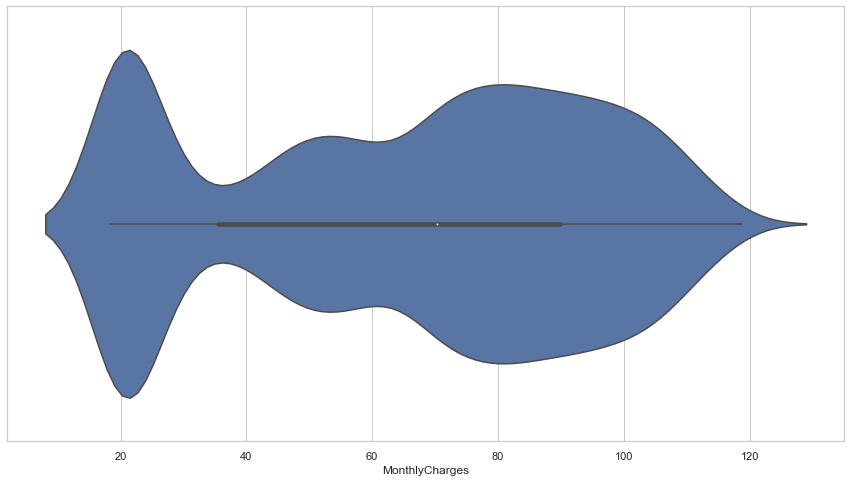

In [45]:
# Configuracion global de los graficos
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})

# Grafico de violin (Permite observar la frecuencia y a su vez su distribucion)
sns.violinplot(x = df['MonthlyCharges'])

#### Análisis univariado - Permanencia en la compañia (tenure)

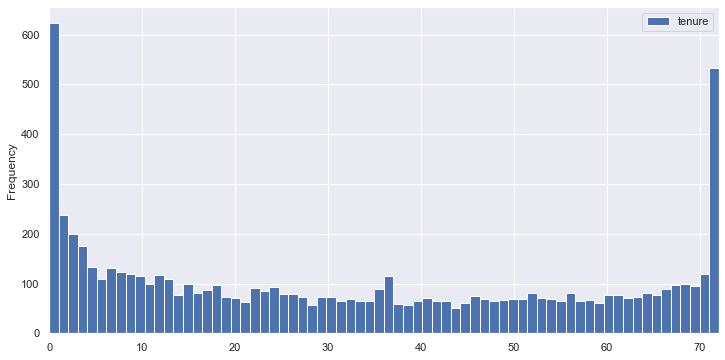

In [27]:
# Histograma
ax = df[['tenure']].plot(kind = "hist", bins=70, figsize=(12, 6), xlim=[0, df.tenure.max()])


##### Encontramos aqui una distribución de tipo "bimodal", es decir, una fuerte frecuencia de clientes que han permanecido muy poco tiempo y a su vez otra fuerte inclinación hacia donde están los que han permanecido más tiempo. 

### Análisis bivariado

##### Analizamos como se comportan las variables entre si y respecto de la variable target para intentar encontrar relaciones o patrones.

#### Analisis bivariado - Metodo de pago VS abandono

<AxesSubplot:xlabel='PaymentMethod'>

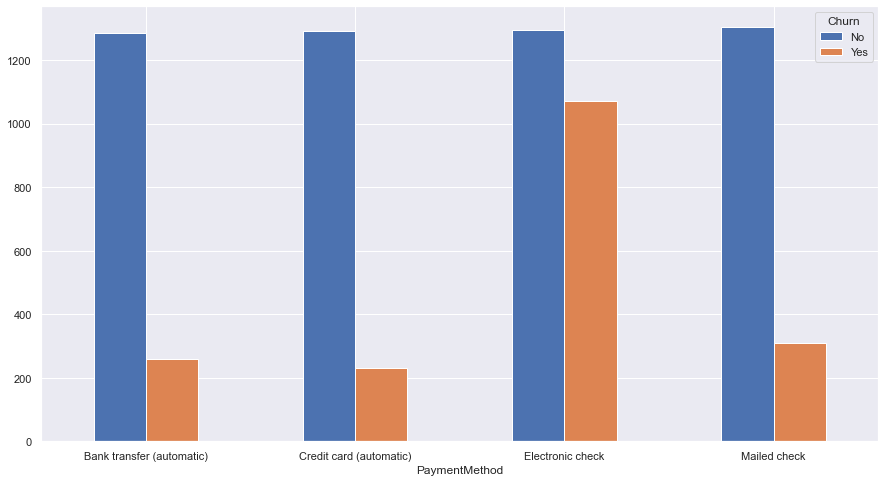

In [32]:
df3 = df.groupby(['PaymentMethod','Churn']).size()
df3 = df3.unstack()
df3.plot(kind='bar', rot='0')

#### Analisis bivariado - Metodo de pago VS Pago mensual VS abandono 

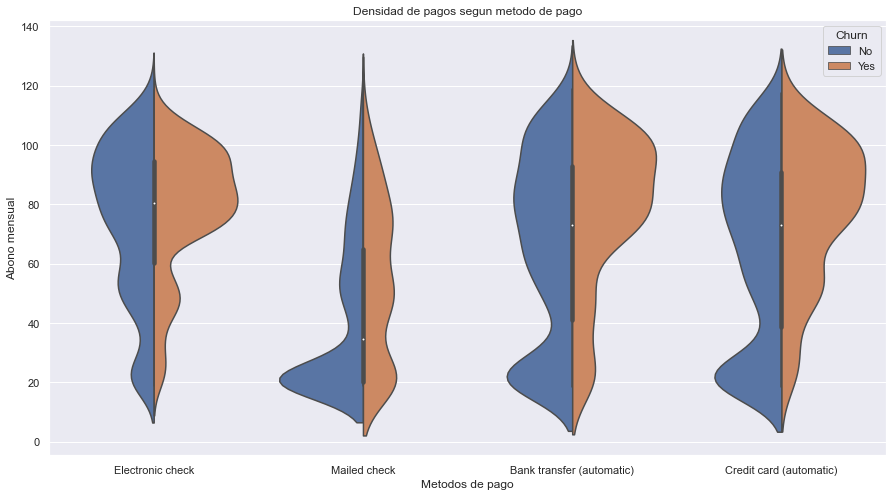

In [33]:
ax = sns.violinplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True)
ax.set(xlabel = "Metodos de pago", ylabel = "Abono mensual", title = "Densidad de pagos segun metodo de pago")

##### Se concluye que los abandonos se concentran en zonas de cobros altos y aun mas pronunciadamente en medio de pago con cheque electrónico

#### Analisis bivariado -  Cobros mensuales vs Tiempo de permanencia vs Abandono

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharges'>

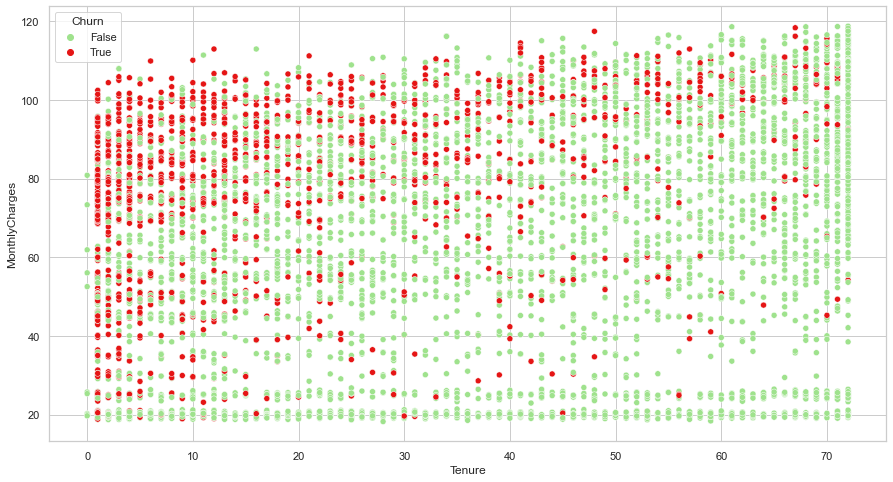

In [87]:
sns.scatterplot(data=df, x="Tenure", y="MonthlyCharges", hue="Churn", palette=['#9FE28D','#E51515'])

##### Se observa claramente que los usuarios que abandonan suelen tener cobros grandes.. Además se aprecia mucha concentración en los primeros meses de permanencia, lo cual sugiere que precios altos en los primeros meses auyentan a los clientes

#### Analisis bivariado - Contrato VS Tiempo de permanencia

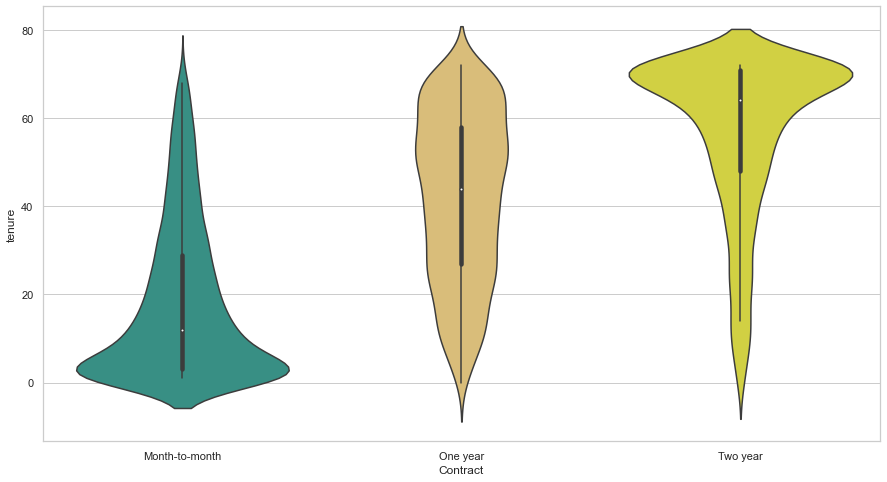

In [55]:
ax = sns.violinplot (x = 'Contract', y = 'tenure', data = df, palette=['#2a9d8f','#e9c46a','#e8e72c'])

#### Analisis bivariado -  Contrato VS abandono

<AxesSubplot:xlabel='Contract'>

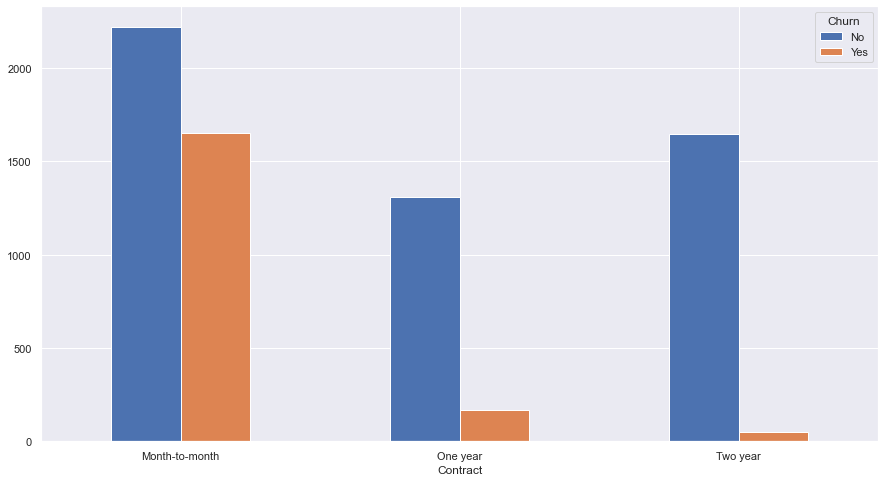

In [43]:
# Afectando por el tipo de abandono
df4 = df.groupby(['Contract','Churn']).size()
df4 = df4.unstack()
df4.plot(kind='bar', rot='0')

#### Analisis bivariado -  Contrato VS permanencia VS abandono

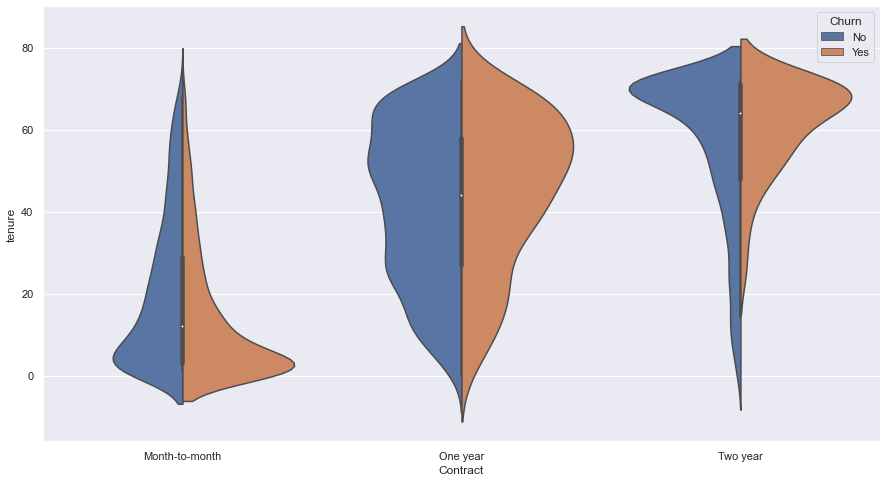

In [37]:
ax = sns.violinplot(x = 'Contract', y = 'tenure', data = df, hue = "Churn", split = True)

##### De estos ultimos 3 graficos se puede determinar que cuanto mayor sea el plazo del contrato, mayor permanencia tendrá y por lo tanto menor probabilidad de abandono

#### Analisis bivariado -  Contrato VS abandono

<AxesSubplot:title={'center':'¿Recibe soporte técnico?'}, xlabel='TechSupport'>

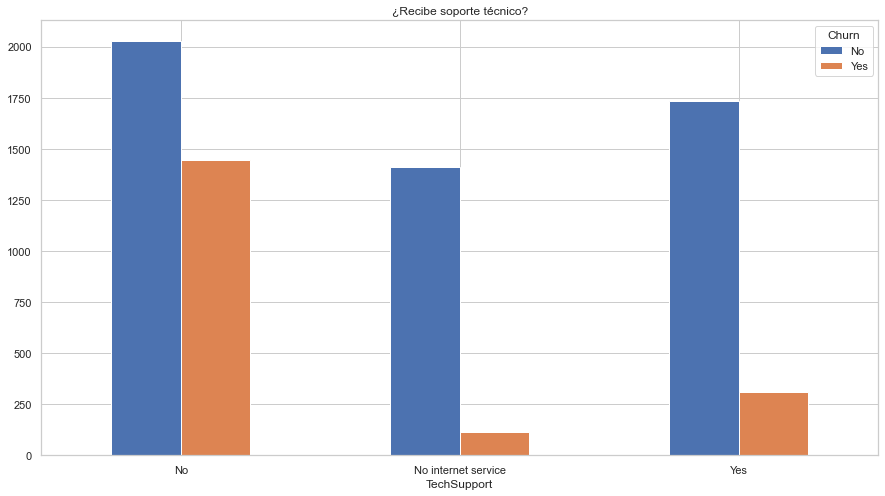

In [50]:
df5 = df.groupby(['TechSupport','Churn']).size()
df5 = df5.unstack()
df5.plot(kind='bar', rot='0', title="¿Recibe soporte técnico?")

##### Queda en evidencia que aquellos usuarios que tienen servicio de internet y no reciben soporte, tienen tendencia a abandonar la compañia

#### Analisis bivariado -  Soporte Tecnico VS abandono

<AxesSubplot:title={'center':'¿Recibe soporte técnico?'}, xlabel='InternetService'>

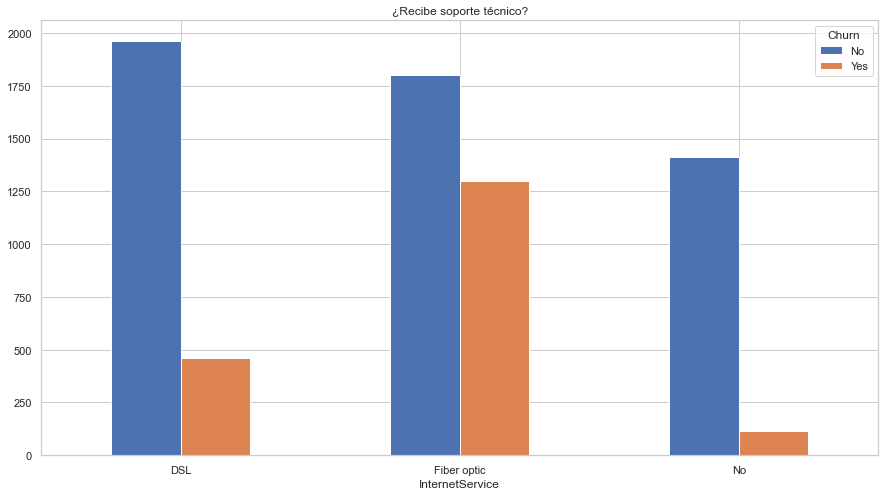

In [56]:
df6 = df.groupby(['InternetService','Churn']).size()
df6 = df6.unstack()
df6.plot(kind='bar', rot='0', title="¿Recibe soporte técnico?")

##### Se aprecia que el servicio de fibra óptica está vinculado a mayores abandonos que DSL, siendo ese servicio el punto débil en cuanto a deserción de usuarios

### Analisis multivariado

#### Transformación de datos

In [57]:
# Renombramiento de campos para normalizar mayusculas:
df = df.rename(columns={'customerID':'CustomerID',
                   'gender':'Gender',
                   'tenure':'Tenure'})

# Conversión de tipos de dato

### Campo de tipo int64
df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')

### decimales a "float"
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Campos de tipo string a booleano
df['Churn'] = df['Churn'].map({'Yes':True, 'No':False})
df['Partner'] = df['Partner'].map({'Yes':True, 'No':False})
df['Dependents'] = df['Dependents'].map({'Yes':True, 'No':False})
df['PhoneService'] = df['PhoneService'].map({'Yes':True, 'No':False})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':True, 'No':False})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':True, 'No':False})

#### Analisis multivariado - Búsqueda de correlaciones con mapa de calor

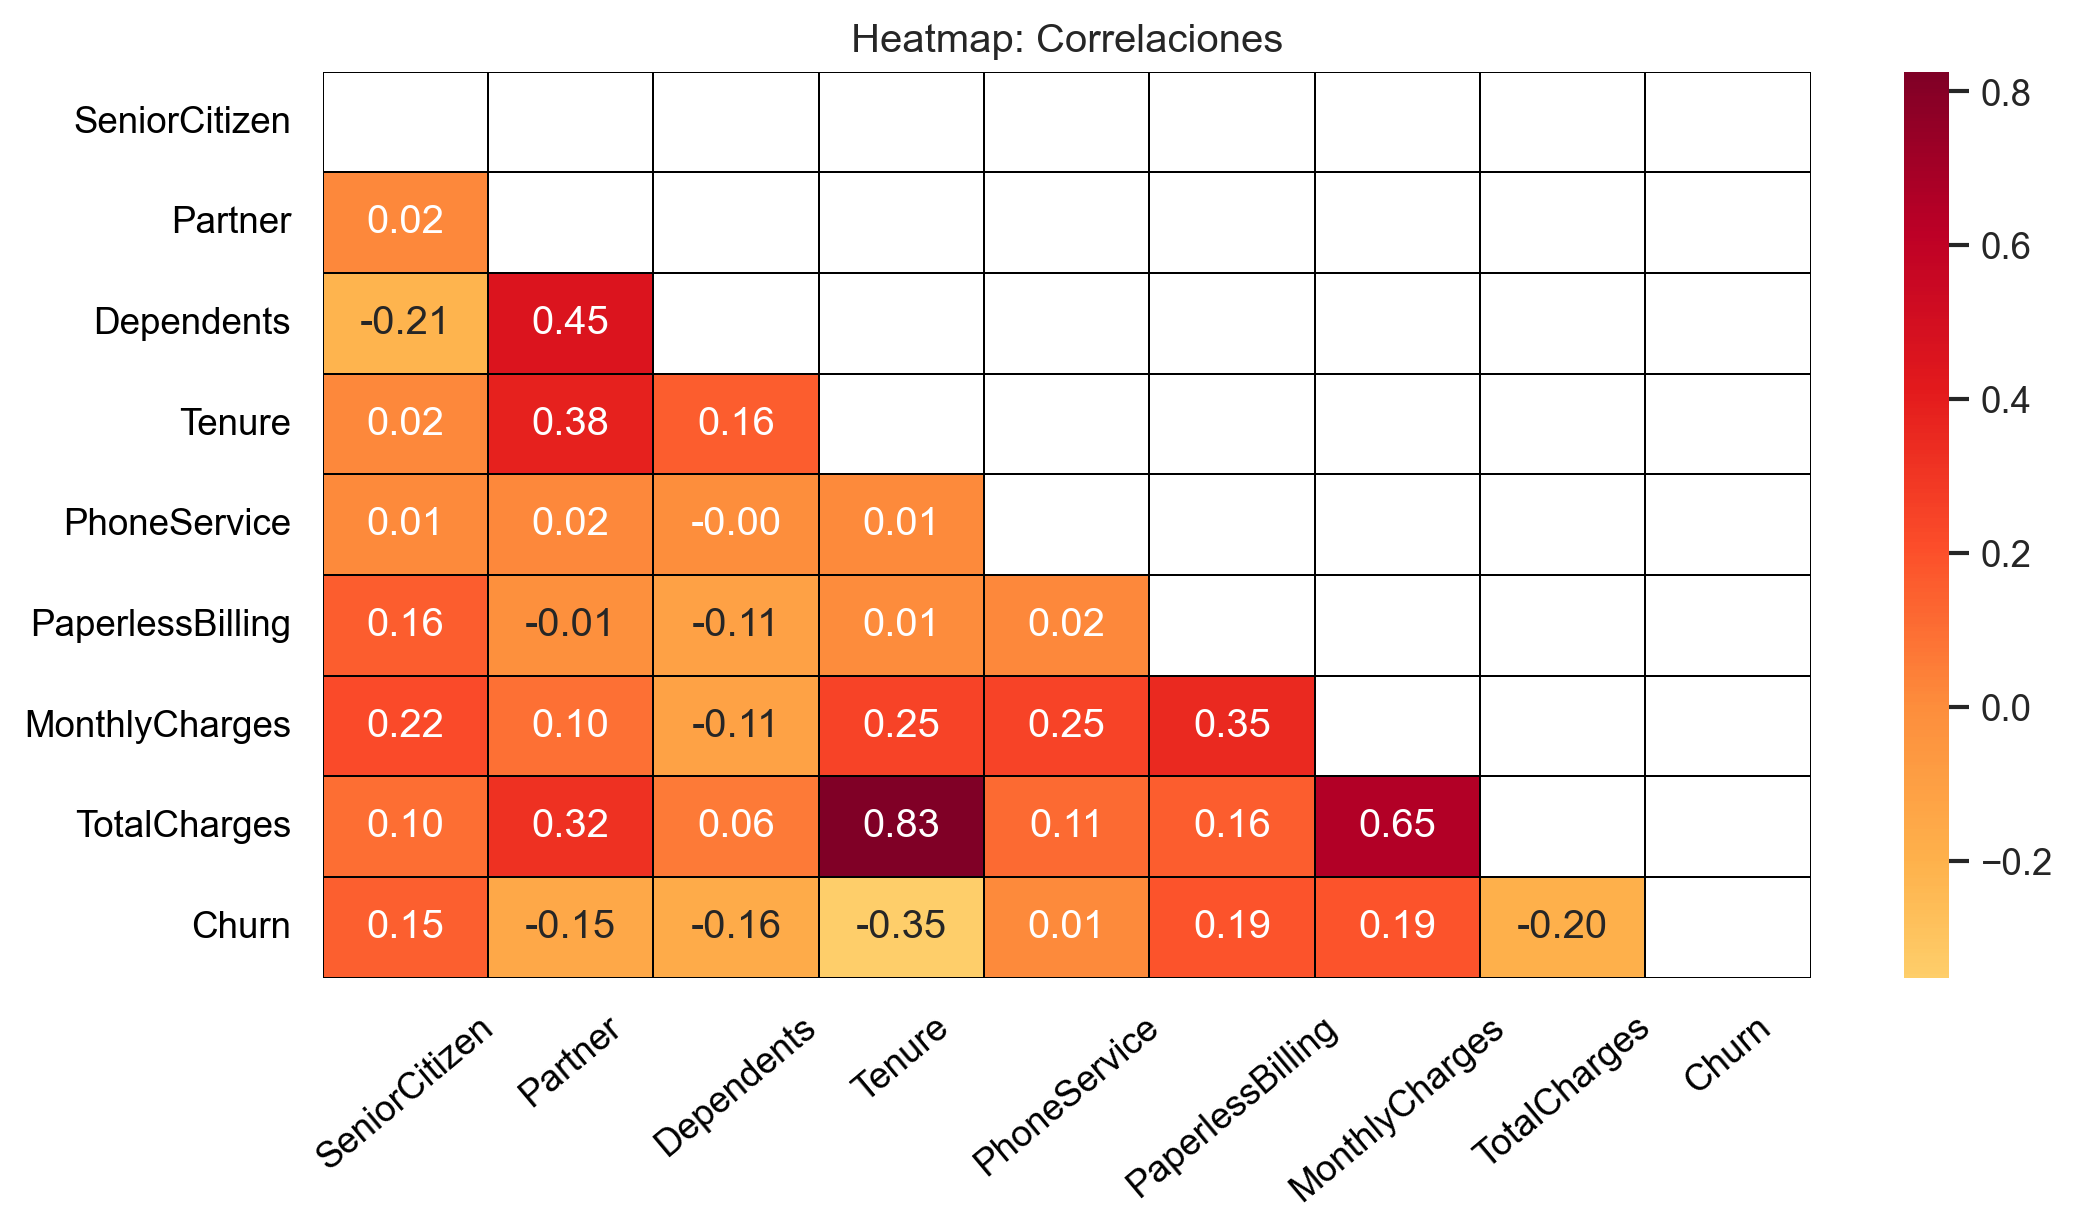

In [58]:
plt.figure ( dpi = 240, figsize = (10,5))

mask = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(df.corr(), mask = mask, center=0, fmt = ".2f",annot=True, linewidth=0.1, linecolor='black', cmap = 'YlOrRd')
plt.yticks(rotation = 0, color='black')
plt.xticks(rotation = 40, color='black')
plt.title('Heatmap: Correlaciones')
plt.show()

##### Se observa una fuerte correlación entre la cantidad de meses que ha permanecido el cliente y el monto total que lleva pagando, lo cual es coherente. De igual manera se interpretan la cantidad de meses y los cargos mensuales por uso del servicio. Nos planteamos aqui la posibilidad de eliminar entonces la variable TotalCharges. Para estar seguros deberiamos ver si existe un sesgo entre abandonos.

#### Analisis multivariado - Cobro total respecto al tiempo de permanencia, segun target

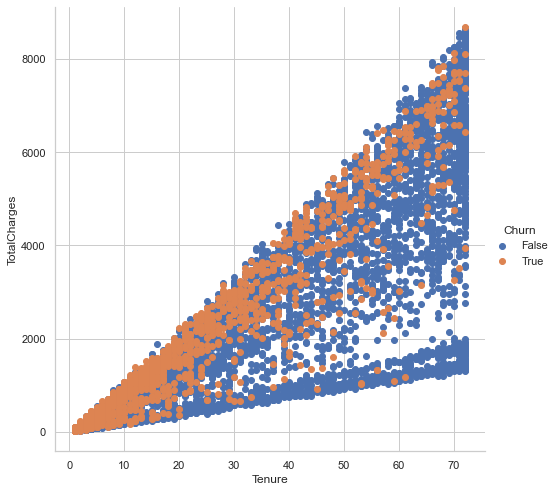

In [60]:
sns.FacetGrid(df,hue = 'Churn' , height = 7).map(plt.scatter,'Tenure','TotalCharges').add_legend()
plt.show()

##### Es posible notar que para aquellos usuarios que abandonaron el servicio, la pendiente de crecimiento es mayor y está casi concentrada, mientras que aquellos que siguen manejan un amplio espectro de dispersión. A pesar de brindar este indicador, no está dando información relevante, por lo tanto se puede descartar la variable "Total Charges"  y reducir asi la dimensionalidad.

## Pasos siguientes

#### Una vez analizados los datos y como se interrelacionan sus variables, pudimos obtener varias conclusiones y descubrir patrones que nos serán utiles. a la hora de predecir la deserción de usuarios. Confiamos en que podremos armar un buen modelo predictivo.